# DAV 5400 Project 4

**Manasi Akre, Maojudan Nihemaiti, Humayra Kausar**

# Introduction

A mushroom or toadstool is the fleshy, spore-bearing fruiting body of a fungus, typically produced above ground, on soil, or on its food source. Currently, there are over 14,000 species of mushrooms, which is suspected to be only a fraction of the actual numbers. While eating mushrooms is popular all over the world, many are not fit for this purpose. About 20% of these mushrooms are harmful, and eating them can make one sick, and about 1% of them can kill you. Unfortunately, differentiating between edible and poisonous mushrooms is difficult since there are no specific features that can tell the two apart.

However, this can be solved with the help of machine learning, which can use data to find whether a mushroom is edible or poisonous. In this project, we will be using the UCI Mushroom Data Set. The source of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/mushroom). We'll begin by importing and formatting the data and running some exploratory analysis on it before constructing a predictive model using scikit-learn library.

In [15]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import Seirs and DataFrame
from pandas import Series, DataFrame

# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

# Import seaborn 
import seaborn as sns

In [35]:
# Read the data from GitHub and create a data frame
mushroom = pd.read_csv('https://raw.githubusercontent.com/Humayrakausar/AIM-5001/master/agaricus-lepiota%20(1).data', header = None)
# Use head function to make sure the data loaded properly
mushroom.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [36]:
# To check the number of rows and columns in the dataset
mushroom.shape

(8124, 23)

The dataset contains 8124 rows and 23 columns

# Data Dictionary 

According to the website, the dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.

The dataset contains of 8124 instances and 22 attributes, all the attributes are nominally valued

Classes: edible = e, poisonous = p  

The attributes of the data are as follows:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d


# Data Preparation

At this stage, we will create a sub dataframe with the columns that will indicate the class of the mushrooms and odor along with other variables to satisfy the project requirements.

In [37]:
# Make use of iloc function to cretae a sub dataframe
mushroom_sub = mushroom.iloc[:, [0, 1, 5, 17,]].copy()
mushroom_sub.head()

,0,1,5,17
0,p,x,p,w
1,e,x,a,w
2,e,b,l,w
3,p,x,p,w
4,e,x,n,w


In [19]:
# Make use of isna and sum function to see if there are any null values in the data set
mushroom_sub.isna().sum()

0     0
1     0
5     0
17    0
dtype: int64

From the result above it can be stated that there is no null value presence in the dataset 

In [38]:
# Provide suitable name for each colum
mushroom_sub.columns = ['Class', 'Cap_shape', 'Odor', 'Veil_color']
mushroom_sub.head()

,Class,Cap_shape,Odor,Veil_color
0,p,x,p,w
1,e,x,a,w
2,e,b,l,w
3,p,x,p,w
4,e,x,n,w


Now, We will transform all the single letter abbreviations into words for better comprehension

In [39]:
# Transform all the column's single letter abbreviated values into words 
mushroom_sub.Class.replace({'e':'edible','p': 'poisonous'}, inplace = True)

mushroom_sub.Cap_shape.replace({'b':'bell', 'c': 'conical', 'x':'convex', 'f': 'flat','k':'knobbed',
                                's': 'sunken'}, inplace = True)

mushroom_sub.Odor.replace({'a': 'almond', 'l': 'anise', 'c': 'creosote','y': 'fishy', 'f': 'foul', 'm': 'musty',
                          'n': 'none', 'p': 'pungent', 's':'spicy'}, inplace = True)

mushroom_sub.Veil_color.replace({'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}, inplace = True)

# To check whether all the intended transformation have completed properly 
mushroom_sub.head()

,Class,Cap_shape,Odor,Veil_color
0,poisonous,convex,pungent,white
1,edible,convex,almond,white
2,edible,bell,anise,white
3,poisonous,convex,pungent,white
4,edible,convex,none,white


From the data above, it can be stated that all the column values transformed properly

# Exploratory Data Analysis

Now that we have the dataset in a proper format, we can perform some analysis on it. We will do this by plotting some graphs and charts. We'll start with the data distribution table of each of the columns in our dataset, followed by plotting frequency charts of each of them.

In [8]:
# Make use of describe function to show the data distribution of each column
mushroom_sub.describe()

,Class,Cap_shape,Odor,Veil_color
count,8124,8124,8124,8124
unique,2,6,9,4
top,edible,convex,none,white
freq,4208,3656,3528,7924


#### Frequency charts for each column

<AxesSubplot:xlabel='Class', ylabel='count'>

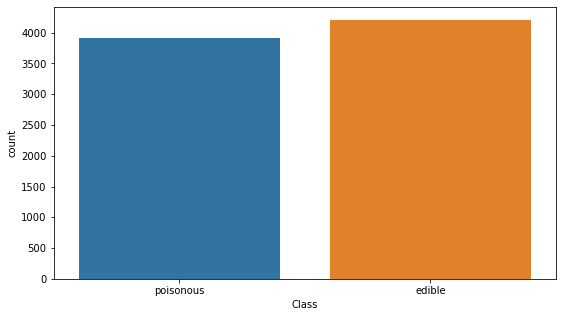

In [66]:
# frequency chart for 'Class'
plt.figure(figsize=(9,5))
class_chart = sns.countplot(x="Class", data=mushroom_sub)
class_chart

<AxesSubplot:xlabel='Cap_shape', ylabel='count'>

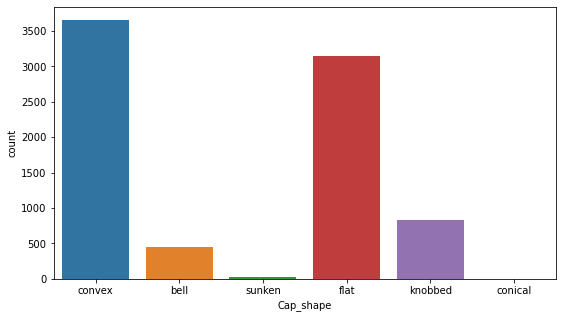

In [77]:
# frequency chart for 'Cap_shape'
plt.figure(figsize=(9,5))
cap_chart = sns.countplot(x="Cap_shape", data=mushroom_sub)
cap_chart

<AxesSubplot:xlabel='Odor', ylabel='count'>

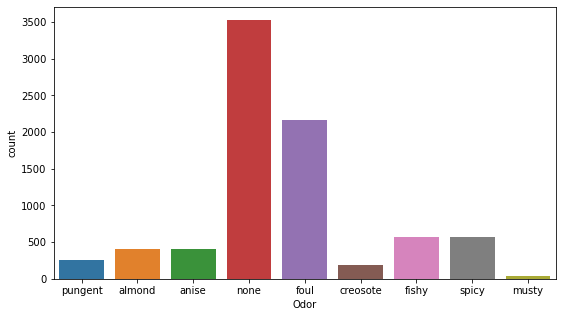

In [64]:
# frequency chart for 'Class'
plt.figure(figsize=(9,5))
odor_chart = sns.countplot(x="Odor", data=mushroom_sub)
odor_chart

<AxesSubplot:xlabel='Veil_color', ylabel='count'>

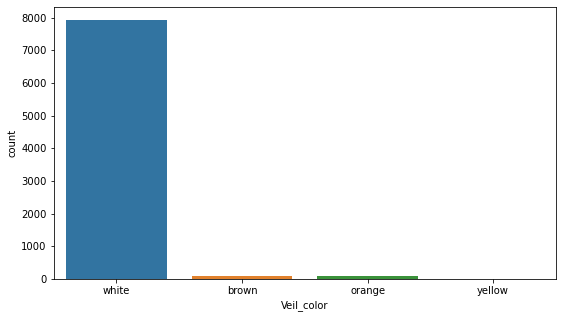

In [75]:
# frequency chart for 'Class'
plt.figure(figsize=(9,5))
veil_chart = sns.countplot(x="Veil_color", data=mushroom_sub)
veil_chart

By plotting a bar plot showcasing the frequency of each element in the columns of the dataset, we get the following readings:

- The number of edible mushrooms exceeds poisonous ones by approximately 400.
- Most of the mushrooms have convex caps, followed by ‘flat’.
- Most of the mushrooms are odorless, followed by 'foul odor'.
- Most of the mushrooms are white.

Now that we have a clear idea of the distribution of the features of the mushrooms in the dataset, we can do further analysis to see if a mushroom's odor, cap shape, and veil color determine whether it is edible or poisonous.

#### Edibility of mushrooms based on its features

We'll analyze this by doing the following comparisons:

<AxesSubplot:xlabel='Odor', ylabel='count'>

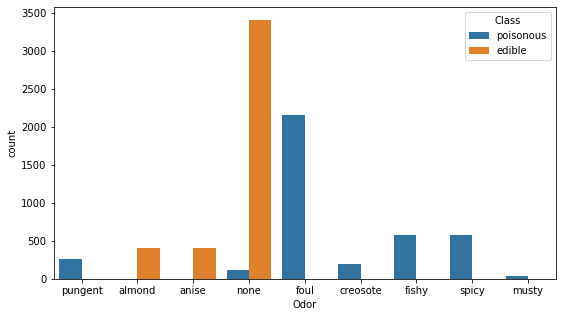

In [60]:
# class vs. odor
plt.figure(figsize=(9,5))
class_odor = sns.countplot(x="Odor", hue="Class", data=mushroom_sub)
class_odor

<AxesSubplot:xlabel='Cap_shape', ylabel='count'>

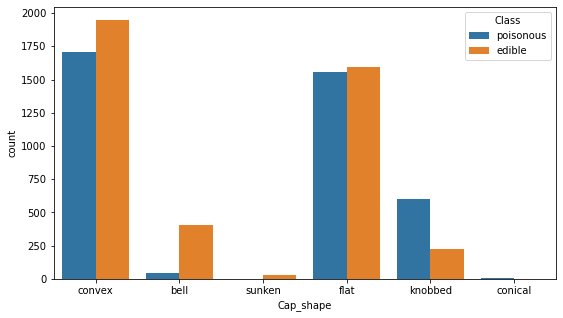

In [69]:
# class v. cap shape
plt.figure(figsize=(9,5))
class_cap = sns.countplot(x="Cap_shape", hue="Class", data=mushroom_sub)
class_cap

<AxesSubplot:xlabel='Veil_color', ylabel='count'>

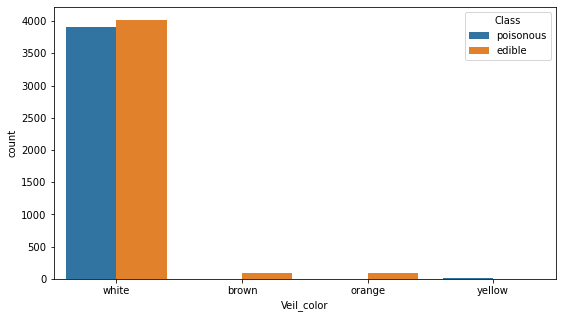

In [78]:
# class v. veil color
plt.figure(figsize=(9,5))
class_veil = sns.countplot(x="Veil_color", hue="Class", data=mushroom_sub)
class_veil

**Class vs. odor** <br />
Most edible mushrooms have no odor, whereas most poisonous ones have a foul. The poisonous ones also have varied types of odors when compared to the edible that ones have only two (almond and anise). Since the proportion of odorless edible mushrooms is far greater than the poisonous ones, we can say that **if a mushroom is odorless, it is most likely edible.** 

**Class vs. cap shape** <br />
Most edible mushrooms are convex or flat, but so are most poisonous ones. The difference between their frequencies isn't that great either, and hence we can say that **the cap shape is not a valid indicator of a mushroom's edibility.**

**Class vs. veil color** <br />
Most edible mushrooms are white, but so are most poisonous ones. The difference between their frequencies is small, and hence we can say that **the veil color can't show if a mushroom is edible or not.**

### Creating Dummy variables for each of the column

In [79]:
# Convert edible and poisonous indicators in class column into digits
mushroom_sub.Class.replace('edible', 0, inplace = True)
mushroom_sub.Class.replace('poisonous', 1, inplace = True)
# To check whether the class column values converted properly
mushroom_sub.head()

,Class,Cap_shape,Odor,Veil_color
0,1,convex,pungent,white
1,0,convex,almond,white
2,0,bell,anise,white
3,1,convex,pungent,white
4,0,convex,none,white


From the data above, it can be inferred that the class column values coverted properly 

In [10]:
# To create dummy variables for rest of the columns 
m_dummy = pd.get_dummies(mushroom_sub)
# To check whether dummy variables created properly 
m_dummy.head()

,Class,Cap_shape_bell,Cap_shape_conical,Cap_shape_convex,Cap_shape_flat,Cap_shape_knobbed,Cap_shape_sunken,Odor_almond,Odor_anise,Odor_creosote,Odor_fishy,Odor_foul,Odor_musty,Odor_none,Odor_pungent,Odor_spicy,Veil_color_brown,Veil_color_orange,Veil_color_white,Veil_color_yellow
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


From the data above, it can be stated that the dummy variables have created for all the intended columns above properly